# Police Stops Data
## Policing & Public Safety Data Toolkit

In [11]:
#    LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt


#    VARIABLES THAT CAN BE CUSTOMIZED
path_datafiles = "../../data/local/"
datafile = "Traffic_Stop_Dataset.csv"


###### Data Background
This analysis is based on the Traffic Stop Dataset downloaded November 20, 2020 at 10:32a.   

It conforms to the [Police Stops Data Dictionary](../../references/data_dictionaries/data_dictionary_police_stops.md) in this repository with the following expections:   
 - missing fields: 'contraband_found', 'arrest_made', 'warning_issued'   
 - additional fields: 'YEAR OF STOP', 'POLICE GRID NUMBER', 'LOCATION OF STOP BY POLICE GRID', 'COUNT'

In [3]:
expected_columns = ['stop_date','subject_race','subject_sex',
                   'subject_age','search_conducted','contraband_found',
                   'citation_issued','warning_issued','frisk_performed',
                   'arrest_made','reason_for_stop']
column_dictionary = {'DATE OF STOP': 'stop_date', 'RACE OF DRIVER': 'subject_race',
                     'GENDER OF DRIVER': 'subject_sex','DRIVER SEARCHED?': 'frisk_performed',
                     'VEHICLE SEARCHED?': 'search_conducted', 'CITATION ISSUED?': 'citation_issued',
                     'AGE OF DRIVER': 'subject_age', 'REASON FOR STOP': 'reason_for_stop',
                     'YEAR OF STOP': 'local_year_of_stop', 'POLICE GRID NUMBER': 'local_police_grid_number',
                     'LOCATION OF STOP BY POLICE GRID': 'local_location_of_stop_by_police_grid',
                     'COUNT': 'local_count'}

### Data Prep

In [4]:
#    Load data
general_df = pd.read_csv(path_datafiles + datafile, parse_dates=['DATE OF STOP'])

In [ ]:
#    check columns
general_df.columns
#    build column_dictionary to change column names

In [4]:
general_df.dtypes

YEAR OF STOP                                int64
DATE OF STOP                       datetime64[ns]
RACE OF DRIVER                             object
GENDER OF DRIVER                           object
DRIVER SEARCHED?                           object
VEHICLE SEARCHED?                          object
CITATION ISSUED?                           object
AGE OF DRIVER                             float64
REASON FOR STOP                            object
POLICE GRID NUMBER                        float64
LOCATION OF STOP BY POLICE GRID            object
COUNT                                       int64
dtype: object

In [7]:
general_df.shape

(765585, 12)

###### Explore uniqueness of data

In [6]:
general_df.nunique()

YEAR OF STOP                           19
DATE OF STOP                       717641
RACE OF DRIVER                          8
GENDER OF DRIVER                        3
DRIVER SEARCHED?                        3
VEHICLE SEARCHED?                       3
CITATION ISSUED?                        2
AGE OF DRIVER                          87
REASON FOR STOP                         5
POLICE GRID NUMBER                    213
LOCATION OF STOP BY POLICE GRID       554
COUNT                                   1
dtype: int64

In [8]:
general_df['RACE OF DRIVER'].unique()

array(['White', 'Black', 'Asian', 'Latino', 'Other', 'Native American',
       'Native Am', 'No Data'], dtype=object)

In [11]:
general_df['GENDER OF DRIVER'].unique()

array(['Female', 'Male', 'No Data'], dtype=object)

In [12]:
general_df['DRIVER SEARCHED?'].unique()

array(['No', 'Yes', 'No Data'], dtype=object)

In [13]:
general_df['VEHICLE SEARCHED?'].unique()

array(['No', 'Yes', 'No Data'], dtype=object)

In [14]:
general_df['CITATION ISSUED?'].unique()

array(['Yes', 'No'], dtype=object)

In [15]:
general_df['REASON FOR STOP'].unique()

array(['Moving Violation', 'Equipment Violation', 'Investigative Stop',
       '911 Call / Citizen Reported', 'No Data'], dtype=object)

In [46]:
general_df.isna().sum()

YEAR OF STOP                            0
DATE OF STOP                            0
RACE OF DRIVER                          0
GENDER OF DRIVER                        0
DRIVER SEARCHED?                        0
VEHICLE SEARCHED?                       0
CITATION ISSUED?                        0
AGE OF DRIVER                      644506
REASON FOR STOP                         0
POLICE GRID NUMBER                     17
LOCATION OF STOP BY POLICE GRID      1742
COUNT                                   0
dtype: int64

###### set up analysis dataframe

In [5]:
#    new columns and strip whitespace
analysis_df = general_df.rename(columns=column_dictionary).apply(lambda x: x.str.strip()
                                                                 if x.dtype == 'object' else x)
#    normalize date for easy analysis by time periods
analysis_df.index = analysis_df['stop_date']
analysis_df.index = analysis_df.index.normalize()
analysis_df.index.name = 'stop_date_normalized'

<AxesSubplot:xlabel='Year'>

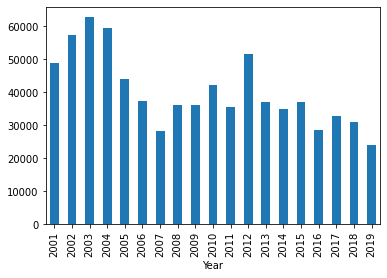

In [8]:
# hour, month, year can be pulled with
#analysis_df.groupby(analysis_df['stop_date'].rename('Hours').dt.hour).size().plot()
#analysis_df.groupby(analysis_df['stop_date'].rename('Month').dt.month).size().plot()
analysis_df.groupby(analysis_df['stop_date'].rename('Year').dt.year).size().plot.bar()

### Analysis

###### What time frame does the data represent?

In [28]:
#print('Minimum date:\t', analysis_df['stop_date'].min(),\
#      '\nMaximum date:\t', analysis_df['stop_date'].max())

print('Minimum date:\t', analysis_df.index.to_period('d').min(),\
      '\nMaximum date:\t', analysis_df.index.to_period('d').max())

Minimum date:	 2001-01-01 00:11:00 
Maximum date:	 2019-12-31 23:52:00


###### Do we see any trends in overall number of stops over time?  Is there a seasonal trend in number of stops for different months of the year?

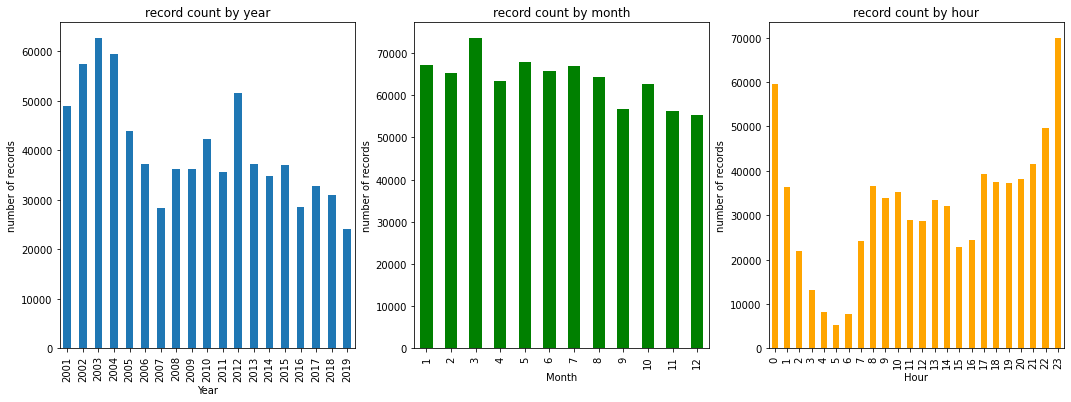

In [17]:
#    Make a graph
fig = plt.figure(constrained_layout=False, figsize=(18,6))
gs1 = fig.add_gridspec(nrows=1, ncols=3)
fig_ax1 = fig.add_subplot(gs1[0,0])
fig_ax2 = fig.add_subplot(gs1[0,1])
fig_ax3 = fig.add_subplot(gs1[0,2])
analysis_df.groupby(analysis_df['stop_date'].rename('Year').dt.year).size().plot.bar(
                    ax=fig_ax1,rot=90,legend=False,ylabel='number of records',title='record count by year')
analysis_df.groupby(analysis_df['stop_date'].rename('Month').dt.month).size().plot.bar(
                    ax=fig_ax2,rot=90,legend=False,ylabel='number of records',
                    title='record count by month',color='green')
analysis_df.groupby(analysis_df['stop_date'].rename('Hour').dt.hour).size().plot.bar(
                    ax=fig_ax3,rot=90,legend=False,ylabel='number of records',
                    title='record count by hour',color='orange')

plt.show()

###### What are the most common reasons for stops?

In [68]:
analysis_df.groupby(analysis_df['stop_date'].rename('Year').dt.year).reason_for_stop.value_counts()

Year  reason_for_stop            
2001  No Data                        48890
2002  No Data                        57369
2003  No Data                        62749
2004  No Data                        59436
2005  No Data                        44009
2006  No Data                        37275
2007  No Data                        28326
2008  No Data                        36311
2009  No Data                        36287
2010  No Data                        42265
2011  No Data                        35575
2012  No Data                        51652
2013  No Data                        37170
2014  No Data                        34842
2015  No Data                        37076
2016  No Data                        28507
2017  Moving Violation               25655
      Equipment Violation             5765
      Investigative Stop              1105
      No Data                          139
      911 Call / Citizen Reported       69
2018  Moving Violation               23204
      Equipment Viol

In [ ]:
a_df = analysis_df.loc['2017-01-01':].copy()

In [59]:
a_df.groupby(a_df['stop_date'].rename('Year').dt.year).reason_for_stop.value_counts()

Year  reason_for_stop            
2017  Moving Violation               25655
      Equipment Violation             5765
      Investigative Stop              1105
      No Data                          139
      911 Call / Citizen Reported       69
2018  Moving Violation               23204
      Equipment Violation             6597
      Investigative Stop              1140
      911 Call / Citizen Reported       69
2019  Moving Violation               16320
      Equipment Violation             6650
      Investigative Stop              1102
      911 Call / Citizen Reported       31
Name: reason_for_stop, dtype: int64

<AxesSubplot:xlabel='Year'>

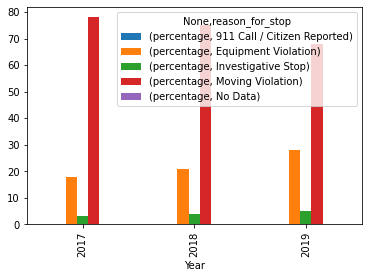

In [66]:
#a_df.groupby(a_df['stop_date'].rename('Year').dt.year).reason_for_stop.value_counts().unstack().plot(kind='bar',stacked=True)
#data.unstack().plot(kind='bar', stacked=True)
g_df = a_df.groupby(a_df['stop_date'].rename('Year').dt.year)['reason_for_stop']
final_df = pd.concat([g_df.value_counts(), 
                g_df.value_counts(normalize=True).mul(100).round(decimals=0)],axis=1, keys=('counts','percentage'))
final_df.loc[:, ['percentage']].unstack().plot.bar()

###### Do different sex/gender groups tend to be stopped for different reasons?

###### Do different race/ethnicity groups tend to be stopped for different reasons?

###### When a person is stopped by the police, how frequently does the stop result in a vehicle search?

In [44]:
analysis_df.loc['2019-12-31'].shape

(37, 12)

In [38]:
analysis_df.groupby('stop_date_normalized')['stop_date'].count()
#outside_quarter_end].groupby('Ship Date')['Ship Date'].count()
analysis_df.groupby(df['Date'].rename('Hours').dt.hour).size().plot.bar()

stop_date_normalized
2001-01-01     83
2001-01-02    165
2001-01-03    253
2001-01-04    273
2001-01-05    173
             ... 
2019-12-27     91
2019-12-28     61
2019-12-29     56
2019-12-30     21
2019-12-31     37
Name: stop_date, Length: 6939, dtype: int64